# NCEP

### Create script

In [8]:
import os
import sys
import pandas as pd
sys.path.append("/home/brayan/mnsun/")
from utils import check_dir
import xarray as xr
import numpy as np

In [16]:
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/NCEP/"
date_update      = "2000-03-21"

In [19]:
def build_sentences(date_, output_):
    """
    Fincion que permite crear las sentencias de descarga y descompresion en un archivo txt a partir del url fuente
    """
    base_u = "wget -cO - https://downloads.psl.noaa.gov//Datasets/ncep.reanalysis/Dailies/surface_gauss/uwnd.10m.gauss.{year}.nc > {output}/TAU/{year}/{year}_uwnd_daily-ncep.nc" 
    base_v = "wget -cO - https://downloads.psl.noaa.gov//Datasets/ncep.reanalysis/Dailies/surface_gauss/vwnd.10m.gauss.{year}.nc > {output}/TAU/{year}/{year}_vwnd_daily-ncep.nc" 
    with open(output_ + "download.txt", "w") as f:
        f.write(base_u.format(year=date_.split("-")[0], output = output_)+ "\n")
        f.write(base_u.format(year=date_.split("-")[0], output = output_)+ "\n")

In [20]:
build_sentences( date_update, OUTPUT_DIR)

In [22]:
OUTPUT_DIR.split("/")[-2]

'NCEP'

### Modify file

In [23]:
import os
#import sys
import xarray as xr
import glob
import numpy as np
import pandas as pd
sys.path.append("/home/brayan/mnsun/")
from utils import check_dir

In [47]:
def dates_download(init_, end_):
    
    """
    Esta funcion permite listar las fechas que seran utilizadas para la descarga.
    
    Input: 
            init_: fecha de inicio [string]
            end_ : fecha final [string]
    Output: 
            : fechas listadas [list]    
    """
    
    if init_ != end_:
        dates_ = pd.date_range(init_, end_, freq="D")
    else:
        dates_ = pd.date_range(init_, periods=1, freq="D")
        
    return [str(i)[:10] for i in dates_.values]  

In [35]:
def create_xarray(data_, dim1, dim2, dim3, dim1_name, dim2_name, dim3_name):
    """
    Se crea un xarray que tiene la siguiente estructura estandar:
    'time, latitud, longitud'
    
    Output: Informacion de data_Xarray en formato float_32 [Xarray] 
    """
    Array  =  xr.DataArray( np.float32(data_) ,
                            coords=[ dim1, dim2, dim3],
                            dims=[ dim1_name, dim2_name, dim3_name])     
    return Array

In [50]:
def wind_to_tau(u_, v_):
    """
    Se crea la variable esfuerzo de vientos a partir de los vientos
    
    Output: Data Xarray en formato float_32
    """
    rho   = 1.22
    C_d   = 0.0013
    taux_ = rho * C_d * np.sqrt(u_**2 + v_**2)*u_
    tauy_ = rho * C_d * np.sqrt(u_**2 + v_**2)*v_
    
    return taux_, tauy_
    

In [25]:
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/NCEP/"
date_update      = "2000-03-21"

In [30]:
file_update_u      = getattr(xr.open_dataset(OUTPUT_DIR + "WIND/" + date_update.split("-")[0] + "/"+date_update.split("-")[0]+ "_uwnd_daily-ncep.nc"), "uwnd")
file_update_v      = getattr(xr.open_dataset(OUTPUT_DIR + "WIND/" + date_update.split("-")[0] + "/"+date_update.split("-")[0]+ "_vwnd_daily-ncep.nc"), "vwnd")

In [46]:
U_32               = create_xarray( file_update_u.values[:,::-1,:],
                                    file_update_u.time, file_update_u.lat.values[::-1], file_update_u.lon, 
                                    "time", "lat", "lon").sel(lat=slice(-31.5, 31.5), lon=slice(89.5, 300.5))

V_32               = create_xarray( file_update_v.values[:,::-1,:],
                                    file_update_v.time, file_update_v.lat.values[::-1], file_update_v.lon, 
                                    "time", "lat", "lon").sel(lat=slice(-31.5, 31.5), lon=slice(89.5, 300.5))

In [84]:
check_dir(OUTPUT_DIR + "TAU/" + date_update.split("-")[0]+"/")

In [85]:
for t, date_ in enumerate(U_32.time.values):
    TAUX, TAUY   = wind_to_tau( U_32.isel(time=t), V_32.isel(time=t))
    date_compact = "".join(str(date_)[:10].split("-"))
    DATASET = xr.Dataset({"taux": TAUX, "tauy": TAUY})
    DATASET.to_netcdf(OUTPUT_DIR + "TAU/" + date_compact[:4] + "/" + date_compact + ".nc")

20000101
20000102
20000103
20000104
20000105
20000106
20000107
20000108
20000109
20000110
20000111
20000112
20000113
20000114
20000115
20000116
20000117
20000118
20000119
20000120
20000121
20000122
20000123
20000124
20000125
20000126
20000127
20000128
20000129
20000130
20000131
20000201
20000202
20000203
20000204
20000205
20000206
20000207
20000208
20000209
20000210
20000211
20000212
20000213
20000214
20000215
20000216
20000217
20000218
20000219
20000220
20000221
20000222
20000223
20000224
20000225
20000226
20000227
20000228
20000229
20000301
20000302
20000303
20000304
20000305
20000306
20000307
20000308
20000309
20000310
20000311
20000312
20000313
20000314
20000315
20000316
20000317
20000318
20000319
20000320
20000321
20000322
20000323
20000324
20000325
20000326
20000327
20000328
20000329
20000330
20000331
20000401
20000402
20000403
20000404
20000405
20000406
20000407
20000408
20000409
20000410
20000411
20000412
20000413
20000414
20000415
20000416
20000417
20000418
20000419
20000420
2

In [86]:
OUTPUT_DIR.split("/")[-2]

'NCEP'

In [51]:
prueba_x, _ = wind_to_tau( U_32, V_32)

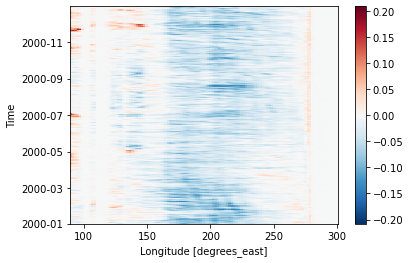

In [54]:
prueba_x.sel(lat=slice(-2.5,2.5)).mean("lat").plot()

/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


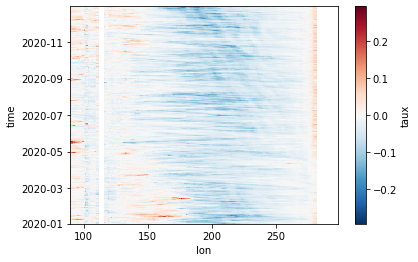

In [70]:
prueba_ASCAT.taux.sel(lat=slice(-2.5,2.5)).mean("lat").plot()

In [58]:
file_ascat_2000 = glob.glob("/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/TAU/2020/*.nc")

In [60]:
file_ascat_2000.sort()

In [62]:
file_ascat_2000[-5:]

['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/TAU/2020/20201227.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/TAU/2020/20201228.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/TAU/2020/20201229.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/TAU/2020/20201230.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/TAU/2020/20201231.nc']

In [66]:
prueba_ASCAT = xr.open_mfdataset(file_ascat_2000, concat_dim = 'time')

/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,

In [69]:
prueba_ASCAT

,Array,Chunk
Bytes,37.02 MB,101.16 kB
Shape,"(366, 121, 209)","(1, 121, 209)"
Count,1464 Tasks,366 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,37.02 MB,101.16 kB
Shape,"(366, 121, 209)","(1, 121, 209)"
Count,1464 Tasks,366 Chunks
Type,float32,numpy.ndarray


In [41]:
U_32

<xarray.DataArray (time: 366, lat: 32, lon: 113)>
array([[[-7.2099915 , -7.0399933 , -6.869995  , ..., -2.5099945 ,
         -2.619995  , -2.0899963 ],
        [-7.2599945 , -6.6900024 , -6.1900024 , ..., -1.9900055 ,
         -1.8600006 , -1.2599945 ],
        [-7.330002  , -6.4900055 , -5.5899963 , ..., -1.3899994 ,
         -0.9900055 , -0.4900055 ],
        ...,
        [-1.6100006 , -0.7200012 , -0.41999817, ..., -4.5099945 ,
         -3.9900055 , -3.7899933 ],
        [-2.5999908 , -0.33999634, -0.02000427, ..., -2.8899994 ,
         -2.8899994 , -2.619995  ],
        [-2.4599915 , -0.9900055 , -0.9900055 , ..., -0.5399933 ,
         -0.6199951 , -0.34999084]],

       [[-6.5599976 , -7.4100037 , -8.339996  , ..., -2.3899994 ,
         -2.369995  , -1.9400024 ],
        [-5.970001  , -6.5599976 , -7.48999   , ..., -1.5699921 ,
         -1.2200012 , -1.0099945 ],
        [-5.7400055 , -5.8399963 , -6.3600006 , ..., -1.1399994 ,
         -0.41000366,  0.07000732],
        ...,
        [-1.4900055 , -0.66000366, -0.4900055 , ..., -7.7899933 ,
         -7.819992  , -7.8099976 ],
        [-2.0200043 , -0.3899994 , -0.31999207, ..., -7.419998  ,
         -7.619995  , -7.5399933 ],
        [-0.7400055 ,  0.5200043 ,  0.7700043 , ..., -6.9400024 ,
         -7.0899963 , -6.9400024 ]],

       [[-6.7099915 , -7.5099945 , -8.160004  , ..., -2.6100006 ,
         -2.6900024 , -2.1399994 ],
        [-6.819992  , -7.7099915 , -8.169998  , ..., -1.3399963 ,
         -1.4900055 , -1.3600006 ],
        [-7.3399963 , -8.209991  , -8.369995  , ..., -0.33999634,
         -0.34999084, -0.44000244],
        ...,
        [-1.0099945 , -0.19000244, -0.34999084, ..., -9.169998  ,
         -9.23999   , -9.339996  ],
        [-1.9400024 , -0.31999207, -0.6399994 , ..., -8.869995  ,
         -9.23999   , -9.410004  ],
        [ 0.25      ,  1.0700073 ,  0.13999939, ..., -7.869995  ,
         -8.139999  , -8.289993  ]],

       ...,

       [[ 4.150009  ,  4.5200043 ,  4.5899963 , ..., -1.3899994 ,
         -1.4100037 , -0.47000122],
        [ 1.550003  ,  1.3200073 ,  1.1199951 , ..., -0.6399994 ,
         -1.1399994 , -0.69000244],
        [-1.7599945 , -1.8600006 , -1.8199921 , ...,  0.6000061 ,
         -0.5099945 , -0.34999084],
        ...,
        [-0.20999146,  0.1000061 , -0.58999634, ...,  5.5       ,
          4.7900085 ,  4.25      ],
        [-0.91999817, -0.13999939, -0.66999817, ...,  7.699997  ,
          6.919998  ,  6.119995  ],
        [ 1.7900085 ,  2.199997  ,  1.2400055 , ...,  7.369995  ,
          8.119995  ,  8.639999  ]],

       [[-2.4900055 , -1.75      , -0.7700043 , ..., -1.6399994 ,
         -0.83999634, -0.11999512],
        [-4.569992  , -3.9900055 , -3.1699982 , ..., -0.8699951 ,
         -0.6100006 , -0.44000244],
        [-6.1100006 , -5.5899963 , -4.9400024 , ...,  0.13999939,
          0.5200043 ,  0.22000122],
        ...,
        [-1.1399994 , -0.69000244, -0.7599945 , ...,  4.919998  ,
          4.9400024 ,  5.470001  ],
        [-0.95999146, -0.3899994 , -0.58999634, ...,  5.3200073 ,
          5.7700043 ,  6.550003  ],
        [ 0.9700012 ,  1.2599945 ,  1.1600037 , ...,  3.6900024 ,
          3.6699982 ,  4.199997  ]],

       [[-4.2099915 , -3.6799927 , -3.1399994 , ..., -1.9400024 ,
         -1.6699982 , -0.9900055 ],
        [-5.7400055 , -5.5899963 , -5.3600006 , ..., -1.3899994 ,
         -1.449997  , -1.1900024 ],
        [-6.6399994 , -6.3899994 , -6.1900024 , ..., -0.3899994 ,
         -0.36999512, -0.55999756],
        ...,
        [-0.11999512, -0.3899994 , -1.2700043 , ...,  2.9400024 ,
          2.8399963 ,  3.        ],
        [ 0.9600067 ,  0.02999878, -1.2400055 , ...,  5.1399994 ,
          4.919998  ,  4.75      ],
        [ 4.8399963 ,  3.850006  ,  2.3899994 , ...,  7.6399994 ,
          6.9900055 ,  6.400009  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
  * lat      (lat) float32 -29.5234 -27.6186 -25.7139 ... 27.6186 29.5234
 

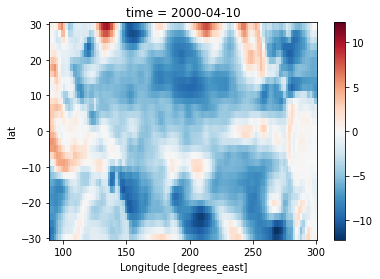

In [44]:
U_32.isel(time=100).plot()

In [37]:
file_update_u.shape

(366, 94, 192)

In [36]:
file_update_u

<xarray.DataArray 'uwnd' (time: 366, lat: 94, lon: 192)>
[6605568 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Attributes:
    long_name:     mean Daily u-wind at 10 m
    units:         m/s
    precision:     2
    GRIB_id:       33
    GRIB_name:     U GRD
    var_desc:      u-wind
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    10 m
    statistic:     Mean
    parent_stat:   Individual Obs
    actual_range:  [-22.059998  25.449997]
    valid_range:   [-102.2  102.2]

In [33]:
file_update_u.isel(lat=45, lon=100)

<xarray.DataArray 'uwnd' (time: 366)>
array([-6.240005, -7.209991, -7.23999 , ..., -5.389999, -7.399994, -6.889999],
      dtype=float32)
Coordinates:
    lat      float32 2.8571
    lon      float32 187.5
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Attributes:
    long_name:     mean Daily u-wind at 10 m
    units:         m/s
    precision:     2
    GRIB_id:       33
    GRIB_name:     U GRD
    var_desc:      u-wind
    dataset:       NCEP Reanalysis Daily Averages
    level_desc:    10 m
    statistic:     Mean
    parent_stat:   Individual Obs
    actual_range:  [-22.059998  25.449997]
    valid_range:   [-102.2  102.2]

In [34]:
np.count_nonzero(np.isnan(file_update_u.isel(lat=45, lon=100)))

0

In [28]:
file_update

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 366)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    uwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2000)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 00/01/30 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [7]:
list_ncs   = [glob.glob(OUTPUT_DIR+"TAU/"+date_.split("-")[0]+"/"+"".join(date_.split("-"))+"*")[0] for date_ in dates_download(init_date_update, end_date_update)]
list_dates = dates_download(init_date_update, end_date_update)

In [13]:
for file_nc, list_date in zip(list_ncs, list_dates):
    if file_nc[-3:] in ["bz2"]:
        continue
    print(file_nc)
    NC   = xr.open_dataset(file_nc)
    TAUX = getattr(NC,"surface_downward_eastward_stress")
    TAUY = getattr(NC,"surface_downward_northward_stress")
    date    = pd.date_range( list_date, periods=1, freq="D")
    lon_old = np.roll(TAUX.longitude.values, int(TAUX.shape[-1]/2))
    
    TAUX_32 = create_xarray( np.roll(TAUX.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                             date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                             "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))
    TAUY_32 = create_xarray( np.roll(TAUY.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                             date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                             "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))
    
    
    DATASET = xr.Dataset({"taux": TAUX_32, "tauy": TAUY_32})
    DATASET.to_netcdf(file_nc.split("00_")[0]+".nc")
    
    

/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2008/2008032200_daily-ifremer-L3-MWF-GLO.nc
/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2008/2008032300_daily-ifremer-L3-MWF-GLO.nc


In [3]:
A

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 365)
Coordinates:
  * lat      (lat) float32 88.542 86.6531 84.7532 ... -84.7532 -86.6531 -88.542
  * lon      (lon) float32 0.0 1.875 3.75 5.625 ... 352.5 354.375 356.25 358.125
  * time     (time) datetime64[ns] 1999-01-01 1999-01-02 ... 1999-12-31
Data variables:
    uwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (1999)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 99/01/04 by Hoop (netCDF2.3)\nConverted to chunke...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

# ASCAT

### Create script

Para esta etapa se hace un procesamiento previo de extraccion de datos donde se elije solo la parte del Pacifico intertropical como dominio y tambien se selecciona las variables: "surface_downward_eastward_stress" y "surface_downward_northward_stress".

In [65]:
import os
import sys
import pandas as pd
sys.path.append("/home/brayan/mnsun/")
from utils import check_dir

# BASE             = "wget ftp://ftp.ifremer.fr/ifremer/cersat/products/gridded/MWF/L3/ASCAT/Daily/Netcdf/{year}/{month}/{day}/{year}{day}00* && bzip2 -d {month}/{day}/{year}{day}00*.bz2"
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/"
init_date_update = "2007-03-21"
end_date_update  = "2007-03-31"

In [66]:
def dates_download(init_, end_):
    
    """
    Esta funcion permite listar las fechas que seran utilizadas para la descarga.
    
    Input: 
            init_: fecha de inicio [string]
            end_ : fecha final [string]
    Output: 
            : fechas listadas [list]    
    """
    
    if init_ != end_:
        dates_ = pd.date_range(init_, end_, freq="D")
    else:
        dates_ = pd.date_range(init_, periods=1, freq="D")
        
    return [str(i)[:10] for i in dates_.values]    

In [76]:
def build_sentences(list_dates_, output_):
    """
    Fincion que permite crear las sentencias de descarga y descompresion en un archivo txt a partir del url fuente
    """
    base_ = "wget -cO - ftp://ftp.ifremer.fr/ifremer/cersat/products/gridded/MWF/L3/ASCAT/Daily/Netcdf/{year}/{month}/{day}/{year}{month}{day}00* > {output}/{year}/{year}{month}{day}00_daily-ifremer-L3-MWF-GLO.nc.bz2 && bzip2 -d ./{year}/{year}{month}{day}00*.bz2"
    #base_ = "wget ftp://ftp.ifremer.fr/ifremer/cersat/products/gridded/MWF/L3/ASCAT/Daily/Netcdf/{year}/{month}/{day}/{year}{month}{day}00* && bzip2 -d ./{year}/{year}{day}00*.bz2"
    with open(output_ + "download.txt", "w") as f:        
        for date_ in list_dates_:
            print(date_)
            check_dir(output_ +date_.split("-")[0]+"/")
            f.write(base_.format(year=date_.split("-")[0], month=date_.split("-")[1], day=date_.split("-")[-1], output = output_)+ "\n")

In [77]:
def main():
    OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/"
    init_date_update = "2007-03-21"
    end_date_update  = "2007-12-31"    
    build_sentences(dates_download(init_date_update, end_date_update) ,OUTPUT_DIR)

def __init__():
    
    OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/"
    init_date_update = "2007-03-21"
    end_date_update  = "2007-12-31"
    print(dates_download(init_date_update, end_date_update))
    build_sentences(dates_download(init_date_update, end_date_update) ,OUTPUT_DIR)

In [78]:
if __name__ == "__main__":
    main()

2007-03-21
2007-03-22
2007-03-23
2007-03-24
2007-03-25
2007-03-26
2007-03-27
2007-03-28
2007-03-29
2007-03-30
2007-03-31
2007-04-01
2007-04-02
2007-04-03
2007-04-04
2007-04-05
2007-04-06
2007-04-07
2007-04-08
2007-04-09
2007-04-10
2007-04-11
2007-04-12
2007-04-13
2007-04-14
2007-04-15
2007-04-16
2007-04-17
2007-04-18
2007-04-19
2007-04-20
2007-04-21
2007-04-22
2007-04-23
2007-04-24
2007-04-25
2007-04-26
2007-04-27
2007-04-28
2007-04-29
2007-04-30
2007-05-01
2007-05-02
2007-05-03
2007-05-04
2007-05-05
2007-05-06
2007-05-07
2007-05-08
2007-05-09
2007-05-10
2007-05-11
2007-05-12
2007-05-13
2007-05-14
2007-05-15
2007-05-16
2007-05-17
2007-05-18
2007-05-19
2007-05-20
2007-05-21
2007-05-22
2007-05-23
2007-05-24
2007-05-25
2007-05-26
2007-05-27
2007-05-28
2007-05-29
2007-05-30
2007-05-31
2007-06-01
2007-06-02
2007-06-03
2007-06-04
2007-06-05
2007-06-06
2007-06-07
2007-06-08
2007-06-09
2007-06-10
2007-06-11
2007-06-12
2007-06-13
2007-06-14
2007-06-15
2007-06-16
2007-06-17
2007-06-18
2007-06-19

### Modify file

In [1]:
import os
#import sys
import xarray as xr
import glob
import numpy as np
import pandas as pd
#sys.path.append("/home/brayan/mnsun/")
#from utils import check_dir

In [2]:
def dates_download(init_, end_):
    
    """
    Esta funcion permite listar las fechas que seran utilizadas para la descarga.
    
    Input: 
            init_: fecha de inicio [string]
            end_ : fecha final [string]
    Output: 
            : fechas listadas [list]    
    """
    
    if init_ != end_:
        dates_ = pd.date_range(init_, end_, freq="D")
    else:
        dates_ = pd.date_range(init_, periods=1, freq="D")
        
    return [str(i)[:10] for i in dates_.values]  

In [3]:
def create_xarray(data_, dim1, dim2, dim3, dim1_name, dim2_name, dim3_name):
    """
    Se crea un xarray que tiene la siguiente estructura estandar:
    'time, latitud, longitud'
    
    Output: Informacion de data_Xarray en formato float_32 [Xarray] 
    """
    Array  =  xr.DataArray( np.float32(data_) ,
                            coords=[ dim1, dim2, dim3],
                            dims=[ dim1_name, dim2_name, dim3_name])     
    return Array

In [6]:
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/"
init_date_update = "2007-03-21"
end_date_update  = "2007-03-23"   

In [7]:
list_ncs   = [glob.glob(OUTPUT_DIR+"TAU/"+date_.split("-")[0]+"/"+"".join(date_.split("-"))+"*")[0] for date_ in dates_download(init_date_update, end_date_update)]
list_dates = dates_download(init_date_update, end_date_update)

In [13]:
for file_nc, list_date in zip(list_ncs, list_dates):
    if file_nc[-3:] in ["bz2"]:
        continue
    print(file_nc)
    NC   = xr.open_dataset(file_nc)
    TAUX = getattr(NC,"surface_downward_eastward_stress")
    TAUY = getattr(NC,"surface_downward_northward_stress")
    date    = pd.date_range( list_date, periods=1, freq="D")
    lon_old = np.roll(TAUX.longitude.values, int(TAUX.shape[-1]/2))
    
    TAUX_32 = create_xarray( np.roll(TAUX.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                             date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                             "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))
    TAUY_32 = create_xarray( np.roll(TAUY.values.reshape(1,TAUX.latitude.shape[0], lon_old.shape[0]), int(TAUX.shape[-1]/2), axis=-1) ,
                             date, TAUX.latitude.values, np.where( lon_old < 0, lon_old + 360, lon_old), 
                             "time", "lat", "lon").sel(lat=slice(-30.5, 30.5), lon=slice(89.5, 300.5))
    
    
    DATASET = xr.Dataset({"taux": TAUX_32, "tauy": TAUY_32})
    DATASET.to_netcdf(file_nc.split("00_")[0]+".nc")
    
    

/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2008/2008032200_daily-ifremer-L3-MWF-GLO.nc
/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2008/2008032300_daily-ifremer-L3-MWF-GLO.nc


## Fill Missing

In [1]:
import os
import gc
import sys
import glob
import xarray as xr
import pandas as pd
import xesmf as xe
import numpy as np
sys.path.append("/home/brayan/mnsun/")
from utils import check_dir

In [2]:
def create_xarray(data_, dim1, dim2, dim3, dim1_name, dim2_name, dim3_name):
    """
    Se crea un xarray que tiene la siguiente estructura estandar:
    'time, latitud, longitud'
    
    Output: Informacion de data_Xarray en formato float_32 [Xarray] 
    """
    Array  =  xr.DataArray( np.float32(data_) ,
                            coords=[ dim1, dim2, dim3],
                            dims=[ dim1_name, dim2_name, dim3_name])     
    return Array

In [3]:
def dates_download(init_, end_):
    
    """
    Esta funcion permite listar las fechas que seran utilizadas para la descarga.
    
    Input: 
            init_: fecha de inicio [string]
            end_ : fecha final [string]
    Output: 
            : fechas listadas [list]    
    """
    
    if init_ != end_:
        dates_ = pd.date_range(init_, end_, freq="D")
    else:
        dates_ = pd.date_range(init_, periods=1, freq="D")
        
    return [str(i)[:10] for i in dates_.values]   

In [4]:
INPUT_DIR        = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/"
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/"
date_update      = "2017-05-30"
lag              = 14

In [5]:
date_update_back = str(pd.date_range( date_update, periods=1, freq="D").shift(-14, freq="D").values[0])[:10]

In [6]:
dates_update     = dates_download( date_update_back, date_update)

In [7]:
file_ascat = []
for date_ in dates_update:
    file_ascat += glob.glob(INPUT_DIR+f"TAU/"+date_.split("-")[0]+"/"+"".join(date_.split("-"))+".nc")

In [8]:
files_exists = [asc_[-11:-7] +"-"+ asc_[-7:-5] +"-"+ asc_[-5:-3] for asc_ in file_ascat]

In [9]:
files_fill   = list(set(dates_update) - set(files_exists))

In [12]:
if file_ascat[-1][-11:] !=  "".join(dates_update[-1].split("-")) + ".nc":
    print("Aqui se acaba el proceso de actualizacion")
    os.environ["pass"] = "false"
else:
    print("pass")
    DS_ASCAT   = xr.open_mfdataset(file_ascat, parallel=True)
    dates_fill = pd.date_range(date_update_back, date_update, freq="D")
    TAUX_MISS  = create_xarray(DS_ASCAT.taux.values, DS_ASCAT.time, DS_ASCAT.lat, DS_ASCAT.lon, "time", "lat", "lon")
    TAUX_FILL  = TAUX_MISS.interp(time=dates_fill, method="linear").interpolate_na(dim="time")
    ds_MOM     = xr.Dataset(
                            {"lon": np.arange( 90, 299, 1), "lat":np.arange( -30, 30.5, 0.5)}
                           )    
    regridder  = xe.Regridder( TAUX_FILL, ds_MOM, "bilinear")
    regridder.clean_weight_file()
    TAUX_FILL_MOM    = regridder(TAUX_FILL)
    TAUX_FILL_32_MOM = create_xarray(TAUX_FILL_MOM.values, TAUX_FILL_MOM.time, np.float32(ds_MOM.lat), np.float32(ds_MOM.lon), "time", "lat", "lon")
    
    TAUY_MISS        = create_xarray(DS_ASCAT.tauy.values, DS_ASCAT.time, DS_ASCAT.lat, DS_ASCAT.lon, "time", "lat", "lon")
    TAUY_FILL        = TAUY_MISS.interp(time=dates_fill, method="linear").interpolate_na(dim="time")
    TAUY_FILL_MOM    = regridder(TAUY_FILL)
    TAUY_FILL_32_MOM = create_xarray(TAUY_FILL_MOM.values, TAUY_FILL_MOM.time, np.float32(ds_MOM.lat), np.float32(ds_MOM.lon), "time", "lat", "lon")
    
    DATASET = xr.Dataset({"taux": TAUX_FILL_32_MOM, "tauy": TAUY_FILL_32_MOM})
    #check_dir(OUTPUT_DIR+ str(date_val)[:4]+"/")
    DATASET.isel(time=-1).to_netcdf(OUTPUT_DIR+"TAU/"+"".join(str(date_)[:10].split("-"))+".nc")
    
    for date_fill in files_fill:
        #check_dir(OUTPUT_DIR+"TAU/" +str(date_val)[:4]+"/")
        DATASET.sel(time=date_fill).to_netcdf(OUTPUT_DIR+"TAU/" +"".join(str(date_fill)[:10].split("-"))+".nc")    
    

pass


/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


Create weight file: bilinear_244x844_121x209.nc
Remove file bilinear_244x844_121x209.nc


/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "
/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


### Fill Missing (1 vez)

In [1]:
import os
import gc
import sys
import glob
import xarray as xr
import pandas as pd
import xesmf as xe
import numpy as np
sys.path.append("/home/brayan/mnsun/")
from utils import check_dir


In [2]:
def create_xarray(data_, dim1, dim2, dim3, dim1_name, dim2_name, dim3_name):
    """
    Se crea un xarray que tiene la siguiente estructura estandar:
    'time, latitud, longitud'
    
    Output: Informacion de data_Xarray en formato float_32 [Xarray] 
    """
    Array  =  xr.DataArray( np.float32(data_) ,
                            coords=[ dim1, dim2, dim3],
                            dims=[ dim1_name, dim2_name, dim3_name])     
    return Array

In [3]:
def dates_download(init_, end_):
    
    """
    Esta funcion permite listar las fechas que seran utilizadas para la descarga.
    
    Input: 
            init_: fecha de inicio [string]
            end_ : fecha final [string]
    Output: 
            : fechas listadas [list]    
    """
    
    if init_ != end_:
        dates_ = pd.date_range(init_, end_, freq="D")
    else:
        dates_ = pd.date_range(init_, periods=1, freq="D")
        
    return [str(i)[:10] for i in dates_.values]   

In [4]:
INPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/"
OUTPUT_DIR       = "/home/brayan/DATA/Modelo-Multimodal-de-Ondas/process/ASCAT/"
init_date_update = "2022-01-01"
end_date_update  = "2022-07-31"   

In [5]:
dates_update     = dates_download( init_date_update, end_date_update)

In [6]:
file_ascat = []
for date_ in dates_update:
    file_ascat += glob.glob(INPUT_DIR+f"TAU/"+date_.split("-")[0]+"/"+"".join(date_.split("-"))+".nc")

In [7]:
file_ascat.sort()

In [8]:
file_ascat[-5:]

['/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2022/20220727.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2022/20220728.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2022/20220729.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2022/20220730.nc',
 '/home/brayan/DATA/Modelo-Multimodal-de-Ondas/raw_data/TAU/2022/20220731.nc']

In [9]:
DS_ASCAT = xr.open_mfdataset(file_ascat, parallel=True)

/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [10]:
dates_fill = pd.date_range(init_date_update, end_date_update, freq="D")

In [11]:
TAUX_MISS = create_xarray(DS_ASCAT.taux.values, DS_ASCAT.time, DS_ASCAT.lat, DS_ASCAT.lon, "time", "lat", "lon")

In [12]:
TAUX_FILL = TAUX_MISS.interp(time=dates_fill, method="linear").interpolate_na(dim="time")

In [13]:
ds_MOM  = xr.Dataset(
                     {"lon": np.arange( 90, 299, 1), "lat":np.arange( -30, 30.5, 0.5)}
                    )

In [14]:
regridder = xe.Regridder( TAUX_FILL, ds_MOM, "bilinear")
regridder.clean_weight_file()

Create weight file: bilinear_244x844_121x209.nc
Remove file bilinear_244x844_121x209.nc


In [15]:
TAUX_FILL_MOM  = regridder(TAUX_FILL)

/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [16]:
TAUX_FILL_32_MOM = create_xarray(TAUX_FILL_MOM.values, TAUX_FILL_MOM.time, np.float32(ds_MOM.lat), np.float32(ds_MOM.lon), "time", "lat", "lon")

In [17]:
TAUX_FILL_MOM.close()
TAUX_MISS.close()
TAUX_FILL.close()
del TAUX_FILL_MOM
del TAUX_MISS
del TAUX_FILL
gc.collect()

1813

In [18]:
TAUY_MISS = create_xarray(DS_ASCAT.tauy.values, DS_ASCAT.time, DS_ASCAT.lat, DS_ASCAT.lon, "time", "lat", "lon")

In [19]:
TAUY_FILL = TAUY_MISS.interp(time=dates_fill, method="linear").interpolate_na(dim="time")

In [20]:
TAUY_FILL_MOM  = regridder(TAUY_FILL)

/home/brayan/anaconda3/envs/pangeo/lib/python3.7/site-packages/xesmf/smm.py:70: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn("Input array is not C_CONTIGUOUS. "


In [21]:
TAUY_FILL_32_MOM = create_xarray(TAUY_FILL_MOM.values, TAUY_FILL_MOM.time, np.float32(ds_MOM.lat), np.float32(ds_MOM.lon), "time", "lat", "lon")

In [22]:
TAUY_FILL_MOM.close()
TAUY_MISS.close()
TAUY_FILL.close()
del TAUY_FILL_MOM
del TAUY_MISS
del TAUY_FILL
gc.collect()

3186

In [23]:
DATASET = xr.Dataset({"taux": TAUX_FILL_32_MOM, "tauy": TAUY_FILL_32_MOM})

In [24]:
for enum, date_val in enumerate(DATASET.time.values):
    check_dir(OUTPUT_DIR+"TAU/" +str(date_val)[:4]+"/")
    DATASET.isel(time=enum).to_netcdf(OUTPUT_DIR+"TAU/" +str(date_val)[:4]+"/"+"".join(str(date_val)[:10].split("-"))+".nc")

In [25]:
np.count_nonzero(np.isnan(DATASET.taux.sel( lat=0, lon=181)))

0